# Przykłady

Ten notebook zawiera przykłady użycia poszczególnych części kodu

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

## Próbkowanie z rozkładku Mallowsa oraz metryka Kendal-$\tau$

In [2]:
from mallows.metrics import KendallTau
from mallows.distribution import Mallows

In [3]:
metric = KendallTau(10)

In [4]:
print(metric(np.arange(10), np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])))
print(metric(np.arange(10), np.array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])))
print(metric(np.arange(10), np.array([0, 1, 2, 4, 3, 5, 7, 6, 7, 9])))
print(KendallTau(6)(np.array([4,2,5,1,0,3]), np.array([4,5,2,1,0,3]))) # sprawdziłem na kartce, wynik jest poprawny, pary (0,1), (0,2), (1,2), (1,5), (2,5)

0
45
2
5


### Rozkład prawdopodobieństwa

1.000000000000003


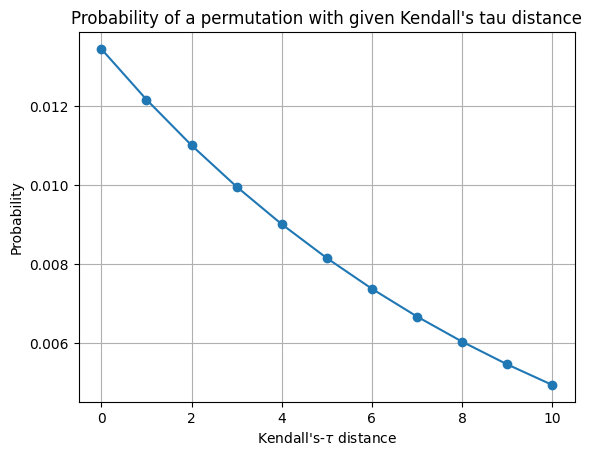

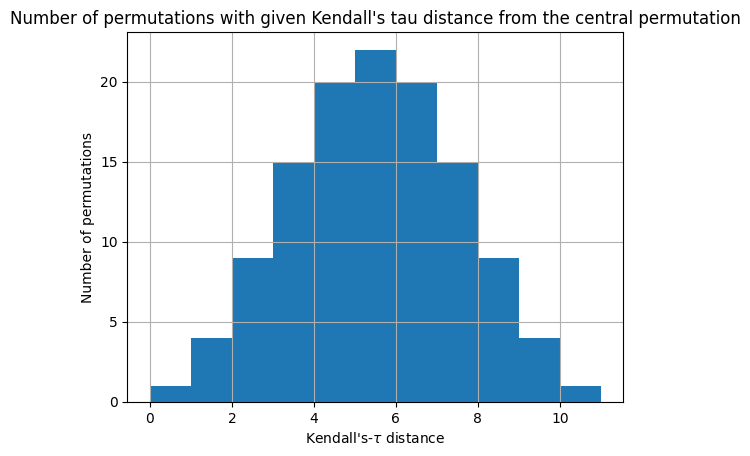

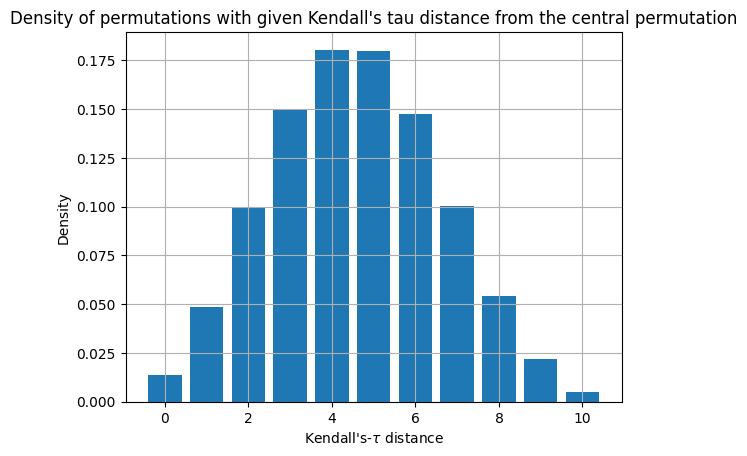

In [5]:
central_permutation = np.array([2,1,3,0,4])
metric = KendallTau(5)
distr = Mallows(central_permutation, 0.1, metric)

probabilities = []

for perm in itertools.permutations(np.arange(5)):
    probabilities.append((metric(central_permutation, perm), distr.probability(perm)))

print(sum([p[1] for p in probabilities]))

distinct_values = list(sorted(set(probabilities), key=lambda x: x[0]))

plt.plot([x[0] for x in distinct_values], [x[1] for x in distinct_values], marker='o')
plt.title("Probability of a permutation with given Kendall's tau distance")
plt.xlabel(r"Kendall's-$\tau$ distance")
plt.ylabel("Probability")
plt.grid()
plt.show()

n_elems, dist, _ = plt.hist([x[0] for x in probabilities], bins=range(12))
plt.title("Number of permutations with given Kendall's tau distance from the central permutation")
plt.xlabel(r"Kendall's-$\tau$ distance")
plt.ylabel("Number of permutations")
plt.grid()
plt.show()

density = n_elems * np.array([x[1] for x in distinct_values])
plt.bar(range(0,11),density)
plt.title("Density of permutations with given Kendall's tau distance from the central permutation")
plt.xlabel(r"Kendall's-$\tau$ distance")
plt.ylabel("Density")
plt.grid()
plt.show()

### Sampling

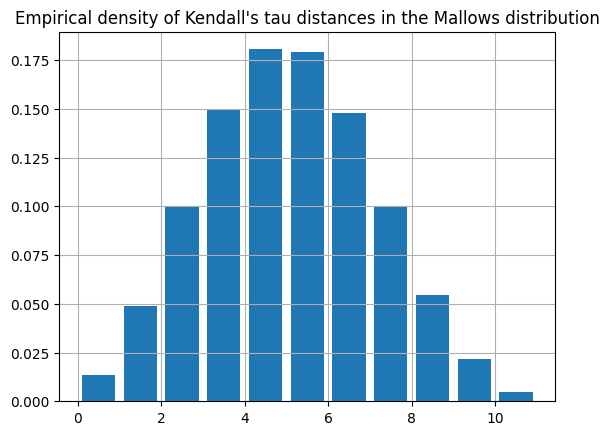

In [6]:
distances = []

for perm in distr.sample_n(1000000):
    distances.append(metric(central_permutation, perm))

plt.hist(distances, bins=range(12), density=True, rwidth=0.8)
plt.grid()
plt.title("Empirical density of Kendall's tau distances in the Mallows distribution")
plt.show()

## Estymacja parametrów rozkładu

### Permutacja centralna

In [7]:
from mallows.utils import estimate_mean

In [8]:
np.random.seed(123)
metric = KendallTau(20)
central_perm = np.array(np.random.permutation(20))
distribution = Mallows(central_perm, 0.1, metric)

In [9]:
distance_to_central = []

for n_samples in np.logspace(1,5, 100, dtype=np.int32):
    samples = distribution.sample_n(n_samples)
    estimated_mean = estimate_mean(samples)
    distance_to_central.append(metric(central_perm, estimated_mean))

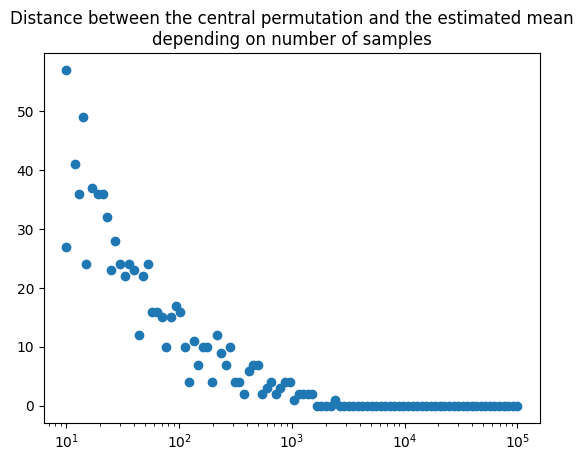

In [10]:
plt.scatter(np.logspace(1,5, 100, dtype=np.int32), distance_to_central, marker='o')
plt.xscale('log')
plt.title("Distance between the central permutation and the estimated mean\ndepending on number of samples")
plt.show()

### Parametr rozrzutu

In [11]:
from mallows.utils import estimate_theta

In [12]:
np.random.seed(42)

metric = KendallTau(20)
central_perm = np.array(np.random.permutation(20))
distribution = Mallows(central_perm, 0.1, metric)

In [13]:
absolute_difference = []

for n_samples in np.logspace(1,5, 100, dtype=np.int32):
    samples = distribution.sample_n(n_samples)
    estimated_theta = estimate_theta(samples, central_perm)
    absolute_difference.append(abs(0.1 - estimated_theta))

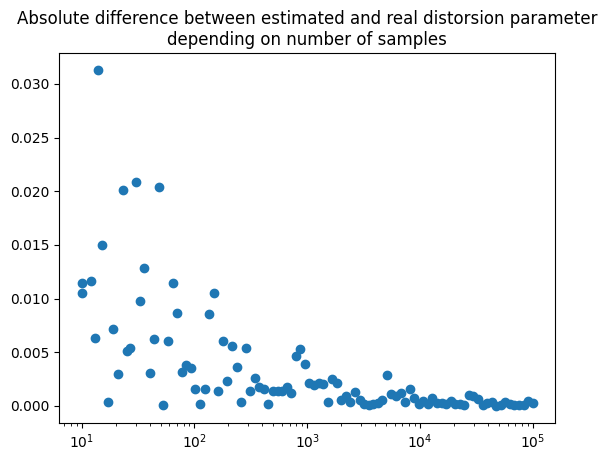

In [14]:
plt.scatter(np.logspace(1,5, 100, dtype=np.int32), absolute_difference, marker='o')
plt.xscale('log')
plt.title("Absolute difference between estimated and real distorsion parameter\ndepending on number of samples")
plt.show()